In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("weight-height.csv")
print(df.shape)
df.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_16740\3615104920.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Height, hist=False,color="blue")
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_16740\3615104920.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

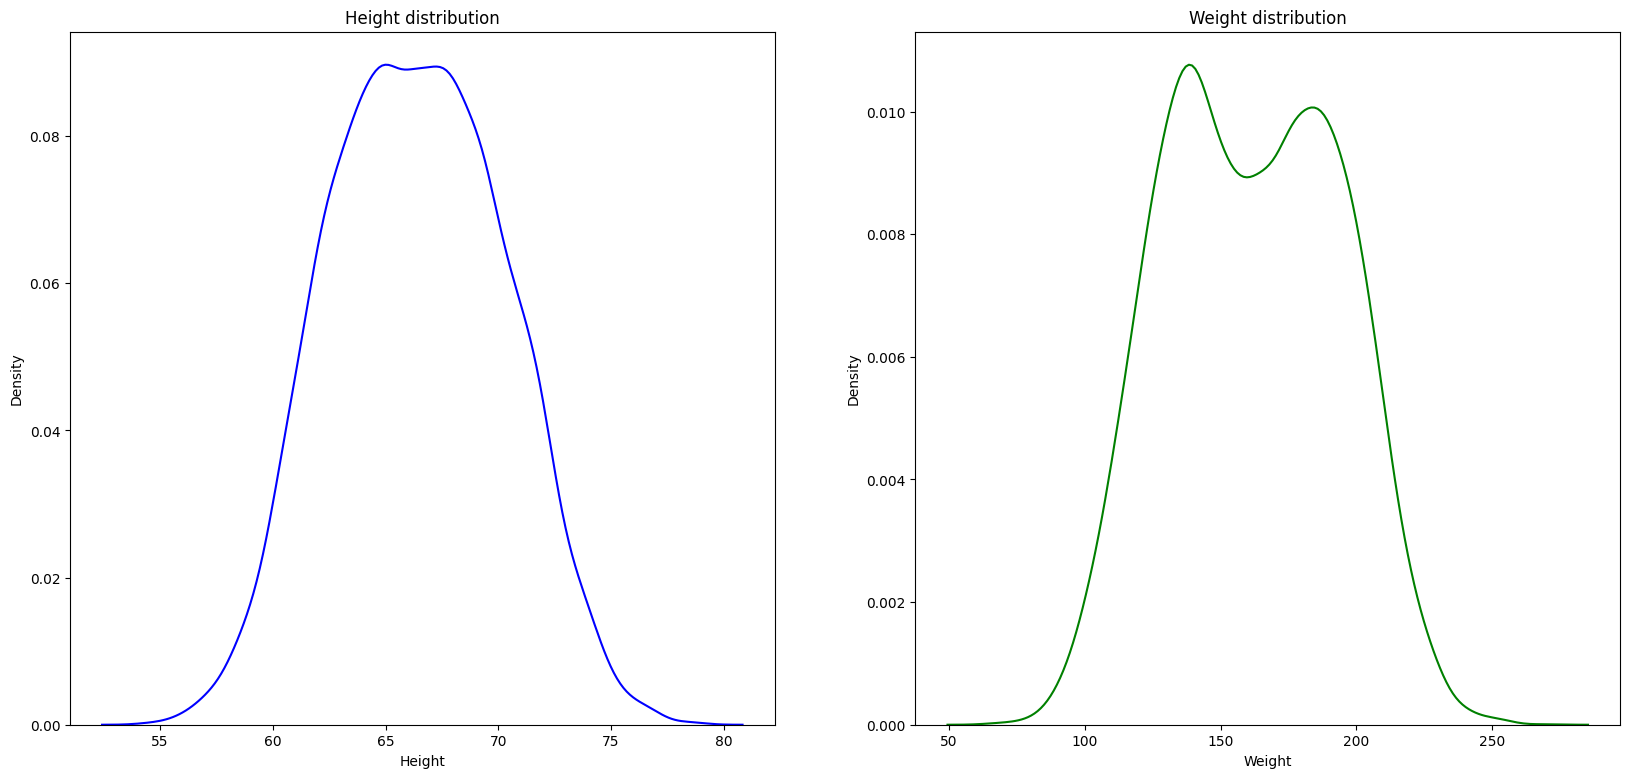

In [8]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.distplot(df.Height, hist=False,color="blue")
plt.title("Height distribution")

plt.subplot(122)
sns.distplot(df.Weight, hist=False,color="green")
plt.title("Weight distribution")

plt.show()

<Axes: ylabel='Height'>

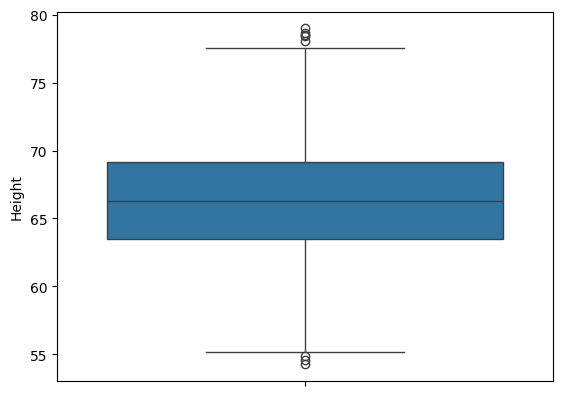

In [11]:
sns.boxplot(df.Height)

In [16]:
upper_limit = df.Height.quantile(0.99)
lower_limit = df.Height.quantile(0.01)
upper_limit , lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [18]:
outliers = df[(df['Height'] > upper_limit ) | (df.Height < lower_limit)]
new_df = df.drop(outliers.index)

In [19]:
new_df.shape

(9800, 3)

In [21]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_16740\3539316347.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],hist=False , color="blue")
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_16740\3539316347.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

Text(0.5, 1.0, 'new df height distribution')

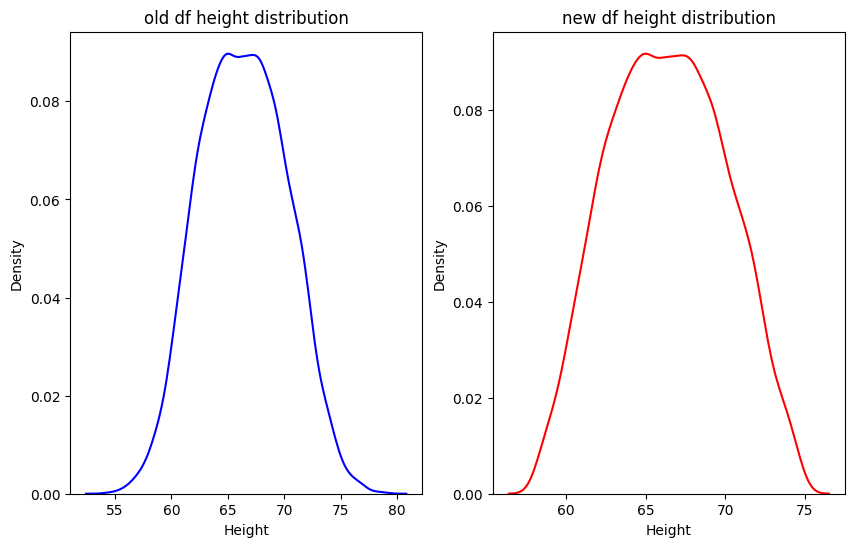

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(df['Height'],hist=False , color="blue")
plt.title("old df height distribution")


plt.subplot(122)
sns.distplot(new_df.Height , hist=False , color="red")
plt.title("new df height distribution")

<Axes: ylabel='Height'>

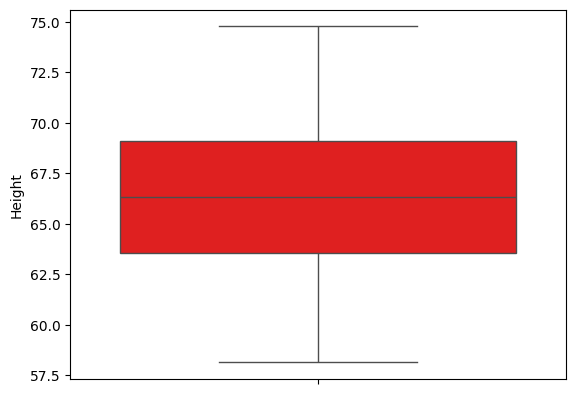

In [27]:
sns.boxplot(new_df.Height,color="red")

In [28]:
# capping --> winsorization
df["Height"] = np.where(
    df.Height > upper_limit , upper_limit ,
    np.where(
        df.Height < lower_limit , lower_limit , df.Height
    )
)

<Axes: ylabel='Height'>

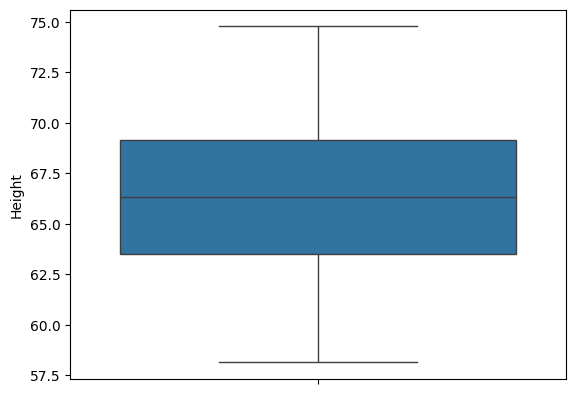

In [30]:
sns.boxplot(df.Height)

In [32]:
df.shape

(10000, 3)

In [34]:
df[df.Height > upper_limit]

,Gender,Height,Weight


In [36]:
df[df.Height < lower_limit]

,Gender,Height,Weight


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_16740\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

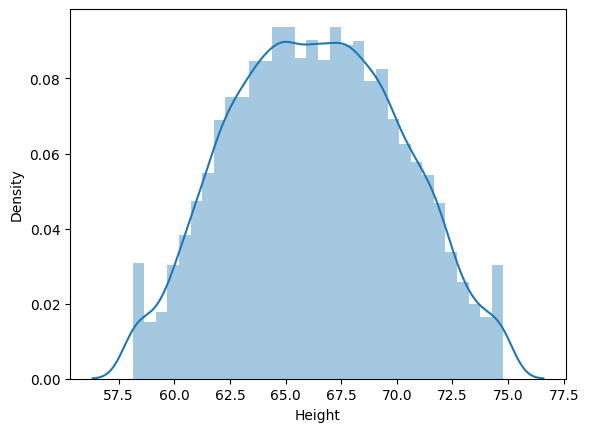

In [37]:
sns.distplot(df['Height'])